In [3]:
# prepare data, select columns for import

import pandas as pd

tomatoes_dataframe = pd.read_csv("data/FAOSTAT_data_12-2-2020_trade.csv")

tomatoes_import_quantity = tomatoes_dataframe[tomatoes_dataframe['Element'] == 'Import Quantity'][['Year', 'Area Code', 'Area', 'Value']]
tomatoes_import_quantity

,Year,Area Code,Area,Value
0,1961,2,Afghanistan,0.0
1,1962,2,Afghanistan,0.0
2,1963,2,Afghanistan,0.0
3,1964,2,Afghanistan,0.0
4,1965,2,Afghanistan,0.0
...,...,...,...,...
37322,2013,181,Zimbabwe,396.0
37323,2014,181,Zimbabwe,84.0
37324,2015,181,Zimbabwe,80.0
37325,2016,181,Zimbabwe,36.0


In [30]:
# change Area Code by iso_a3

country_code = pd.read_csv("data/map_country_code.csv")

def transform_to_iso3(area_code):
    for code in country_code['Country Code']:
        if area_code == code:
            return country_code['ISO3 Code'][code]
    return 'no_code_for_this_country'

iso_a3_serie = tomatoes_import_quantity['Area Code'].apply(transform_to_iso3)
iso_a3_serie = iso_a3_serie.rename('iso_a3')
iso_a3_serie
tomatoes_import_quantity['iso_a3'] = iso_a3_serie
tomatoes_import_quantity

,Year,Area Code,Area,Value,iso_a3
0,1961,2,Afghanistan,0.0,ALA
1,1962,2,Afghanistan,0.0,ALA
2,1963,2,Afghanistan,0.0,ALA
3,1964,2,Afghanistan,0.0,ALA
4,1965,2,Afghanistan,0.0,ALA
...,...,...,...,...,...
37322,2013,181,Zimbabwe,396.0,MID
37323,2014,181,Zimbabwe,84.0,MID
37324,2015,181,Zimbabwe,80.0,MID
37325,2016,181,Zimbabwe,36.0,MID


<AxesSubplot:title={'center':'Tomatoes import by year'}, xlabel='Year'>

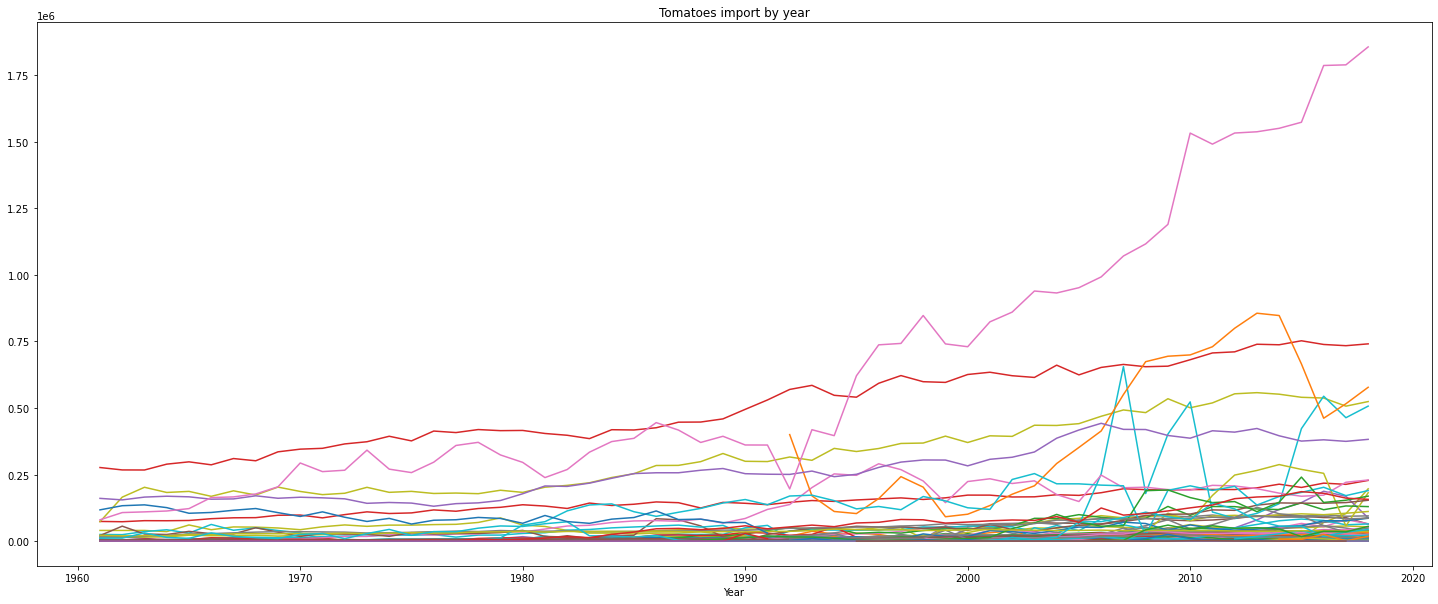

In [5]:
import matplotlib.pyplot as plt
tomatoes_import_quantity_by_year = tomatoes_import_quantity.pivot(index='Year', columns='Area')
tomatoes_import_quantity_by_year
fig, ax = plt.subplots()
fig.set_size_inches((25,10))
ax.set_axis_on()
ax.set_title('Tomatoes import by year')
# ax.legend('best')
tomatoes_import_quantity_by_year.plot(kind='line', ax=ax , legend=False)

<AxesSubplot:>

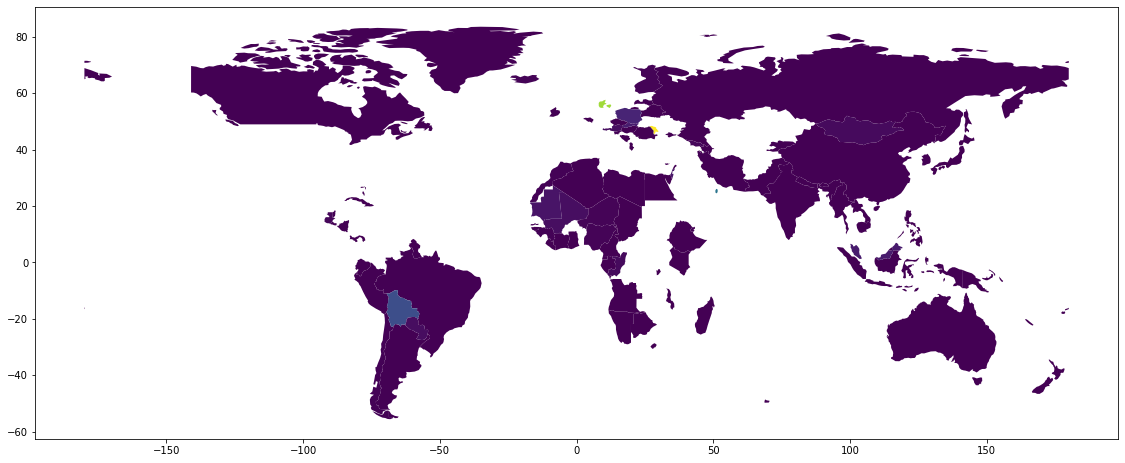

In [54]:
# try with map
from mpl_toolkits.axes_grid1 import make_axes_locatable
import geopandas
fig, ax = plt.subplots()
fig.set_size_inches((20,10))
divider = make_axes_locatable(ax)
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
tomatoes_import_quantity_in_2000 = tomatoes_import_quantity[tomatoes_import_quantity['Year'] == 2000]
world = world.join(tomatoes_import_quantity_in_2000.set_index('iso_a3')['Value'], on='iso_a3')
world.plot(ax=ax, column='Value')
